In [17]:
import print
import data
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pylab
pylab.ion

<function matplotlib.pyplot.ion>

In [3]:
print.welcome()

Welcome to Otero Assassins!
Would you like to watch as an entire dorm gets killed off one by one?
Well, you can't.
But enjoy this animation of a bunch of nodes dying off in lieu of the actual thing!
Before we start, would you like a quick overview of the game? Y/N Y

Great! Here's how Assassins works:

Assassins is a live-action game in which players try to eliminate one another using mock weapons.
Each player has a specific target, and their role is to track and eliminate that target.
Once the player has eliminated their target, they proceed to track their victim's target.
The game is over when there is only one player remaining.


In [27]:
# Number of people playing Assassins
nplayers = len(data.players)
nelim = 0

In [28]:
# Create a network (MultiDiGraph)
# Each node represents a player
# Each edge {u, v} represents player v as the target of player u
G = nx.DiGraph()
for i in range(nplayers):
    G.add_edge(data.players[i], data.players[(i+1)%nplayers])

In [29]:
def find_assassin(victim):
    for n in G:
        for nbr in G[n]:
            if nbr == victim: return n

def find_new_target(victim):
    for nbr in G[victim]:
        return nbr

In [30]:
def update_network():
    global nelim

    victim = data.eliminated[nelim]
    assassin = find_assassin(victim)
    new_target = find_new_target(victim)
    G.remove_edge(assassin, victim)
    G.remove_edge(victim, new_target)
    G.remove_node(victim)
    G.add_edge(assassin, new_target)

    nelim += 1
    nx.draw(G, pos=nx.kamada_kawai_layout(G), arrows=True, with_labels=True)

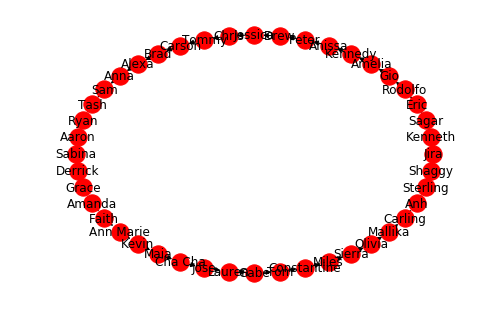

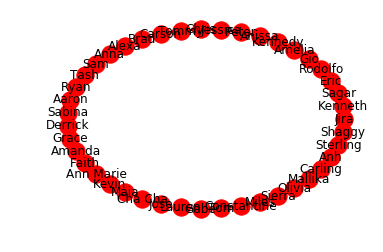

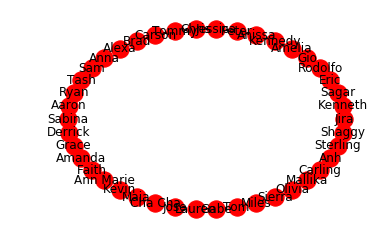

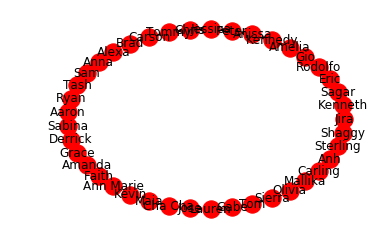

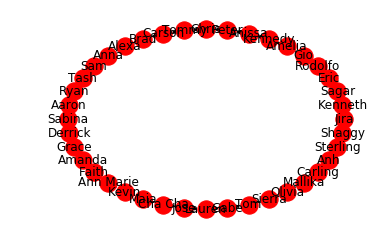

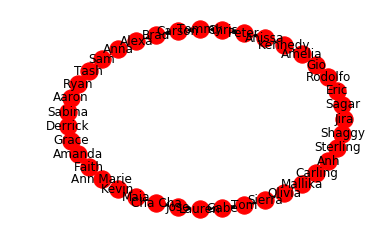

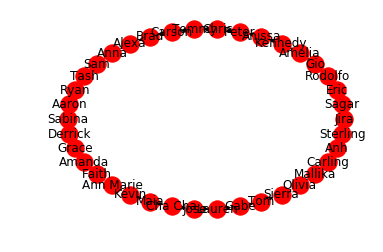

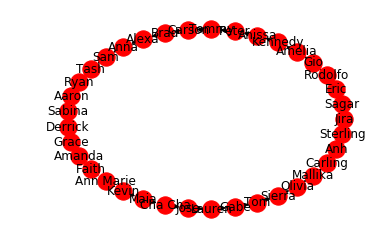

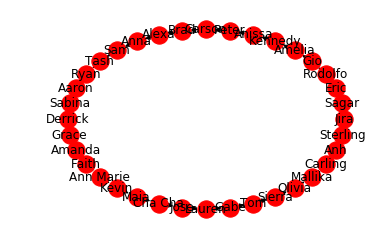

ValueError: object too deep for desired array

<Figure size 432x288 with 1 Axes>

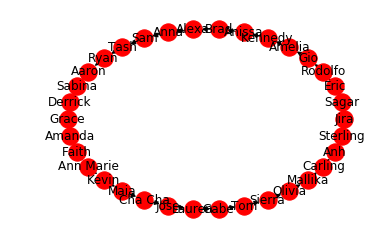

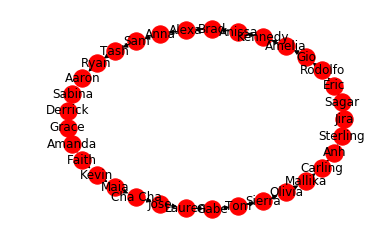

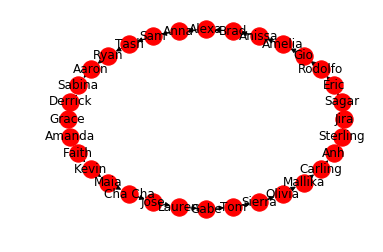

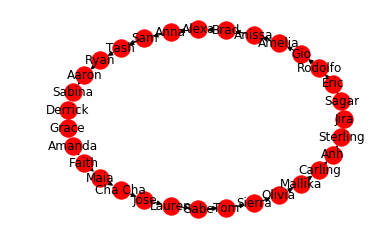

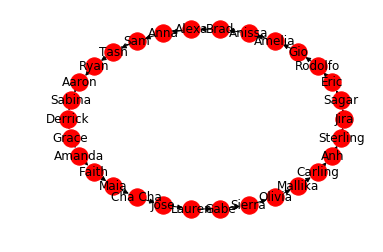

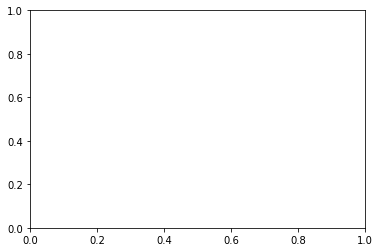

In [31]:
pylab.show()
pylab.draw()
for i in range(len(data.eliminated)):
    update_network()
    pylab.draw()
    plt.pause(0.5)
    pylab.cla()